In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
df = pd.read_csv("../data/bank-full.csv", sep=";")

Describe the dataset informations

In [4]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.columns.values[(df.dtypes==int) + (df.dtypes==float)]

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'], dtype=object)

Use histogramms to display the features' distribution

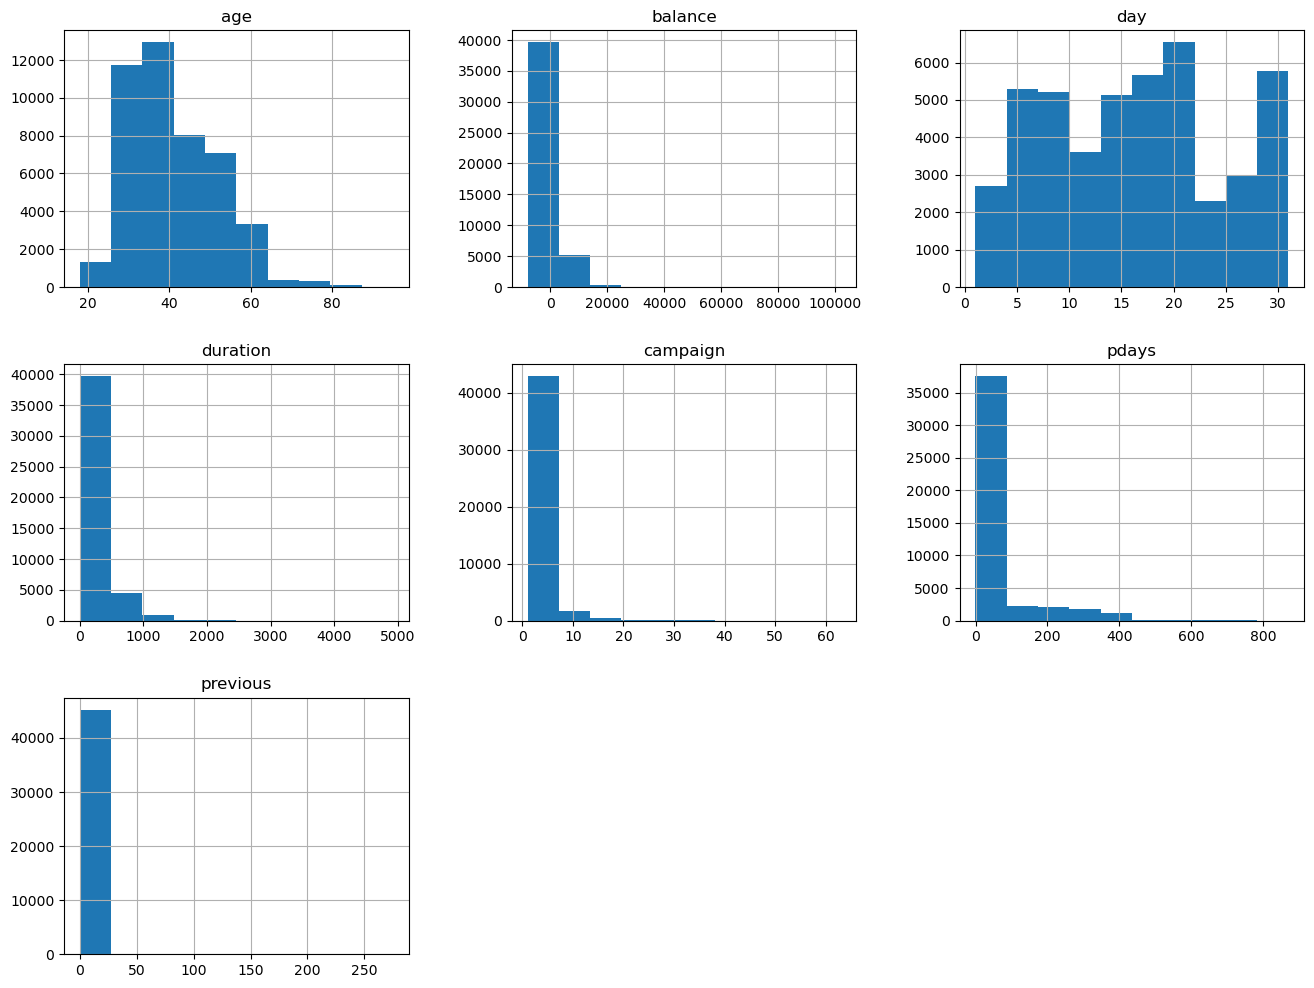

In [7]:
df.hist(figsize=(16,12))
plt.show()

Use heatmap to display the numerical features' correlation

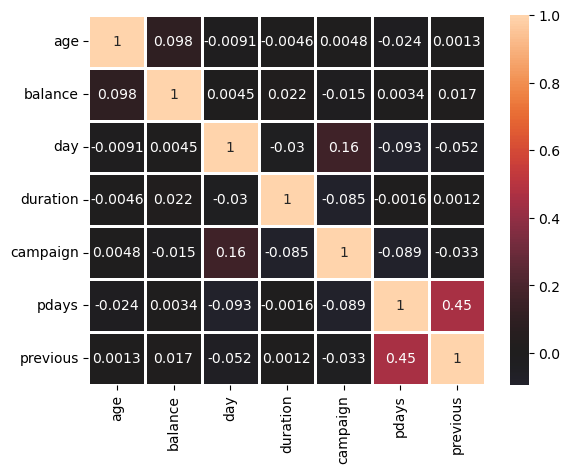

In [8]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=2, center=0)
plt.show()

Hop hop hop!!! Not to fast!! Before processing data for machine learning, do you think that all the data are useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [9]:
# remove duration column
df = df.drop(columns="duration", axis=1)

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the proper hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe it is a good hypothesis, maybe not. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`. 

You can use pandas datetime tools or python **datetime** librairies for doing this preprocessing. To find the the day of year, look as *dayofyear* method from **datetime** library and examples such as https://pythonguides.com/extract-day-number-of-the-year-from-a-date-in-python/ or https://docs.lucee.org/reference/functions/dayofyear.html
(the default year used will be 1984)

In [10]:
#code here
# You can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
import datetime
df['dayoftheyear'] = pd.to_datetime("1984" + "-" + df["month"] + "-" + df["day"].astype(str), format='%Y-%b-%d')
df['dayoftheyear'] = df['dayoftheyear'].dt.dayofyear.astype(int)
df = df.drop(columns=["day", "month"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   campaign      45211 non-null  int64 
 10  pdays         45211 non-null  int64 
 11  previous      45211 non-null  int64 
 12  poutcome      45211 non-null  object
 13  y             45211 non-null  object
 14  dayoftheyear  45211 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [12]:
df["dayoftheyear"].sample(10)

27418    326
1797     130
41478    251
40472    185
13742    192
40909    225
33439    111
36279    132
19834    221
3513     136
Name: dayoftheyear, dtype: int64

We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. 

Now sort the features into categorical and numerical features

In [13]:
categorical_features = df.columns.values[df.dtypes==object]
for col in categorical_features:
    print("->", col, "\t", df[col].unique())

-> job 	 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
-> marital 	 ['married' 'single' 'divorced']
-> education 	 ['tertiary' 'secondary' 'unknown' 'primary']
-> default 	 ['no' 'yes']
-> housing 	 ['yes' 'no']
-> loan 	 ['no' 'yes']
-> contact 	 ['unknown' 'cellular' 'telephone']
-> poutcome 	 ['unknown' 'failure' 'other' 'success']
-> y 	 ['no' 'yes']


In [14]:
twocat_features = ["default", "housing", "loan"]
multicat_features = ["job", "marital", "education", "contact", "poutcome"]
numerical_features = df.columns.values[(df.dtypes==int) + (df.dtypes==float)]

After a first exploration, categorical/ordinal features (8 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html).

(You can also use the function `gethg_dummies` of pandas for categorical features)

In [15]:
# Create the X and y DataFrames
df["y"] = df["y"].replace({"no": 0, "yes":1})
y = df["y"]

X = df.drop(columns="y", axis=1)

# Train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

/tmp/ipykernel_79235/3350713954.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["y"] = df["y"].replace({"no": 0, "yes":1})


In [16]:
# import and create the appropriate transformers 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

twocat_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(categories=[["no", "yes"], ["no", "yes"], ["no", "yes"]]))
])

multicat_pipeline = Pipeline([
    ('onehot_encoder', OneHotEncoder(handle_unknown='error'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('twocat', twocat_pipeline, twocat_features),
    ('multicat', multicat_pipeline, multicat_features)
], remainder="passthrough")

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### Dummy Classifier

It is always a good idea to begin with a dummy model as a baseline

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Code here to get dummy classifier F1score and accuracy
dummy_clf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))
])

dummy_clf.fit(X_train, y_train)

#
def show_model_metrics(estimator, y_pred, y_true, name="classifier"):
    print(type(estimator[name]).__name__)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("f1-score:", f1_score(y_true, y_pred))
    print("------------------")

y_pred_dummy = dummy_clf.predict(X_test)
show_model_metrics(dummy_clf, y_pred_dummy, y_test)

DummyClassifier
Accuracy: 0.8858710076970716
Precision: 0.0
Recall: 0.0
f1-score: 0.0
------------------


/home/julien-d/anaconda3/envs/ML2/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt1_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3))
])

# Fit the model
dt1_clf.fit(X_train, y_train)

# Show metrics
y_pred = dt1_clf.predict(X_test)
show_model_metrics(dt1_clf, y_pred, y_test)

DecisionTreeClassifier
Accuracy: 0.8940104397062727
Precision: 0.6483870967741936
Recall: 0.1558139534883721
f1-score: 0.25125
------------------


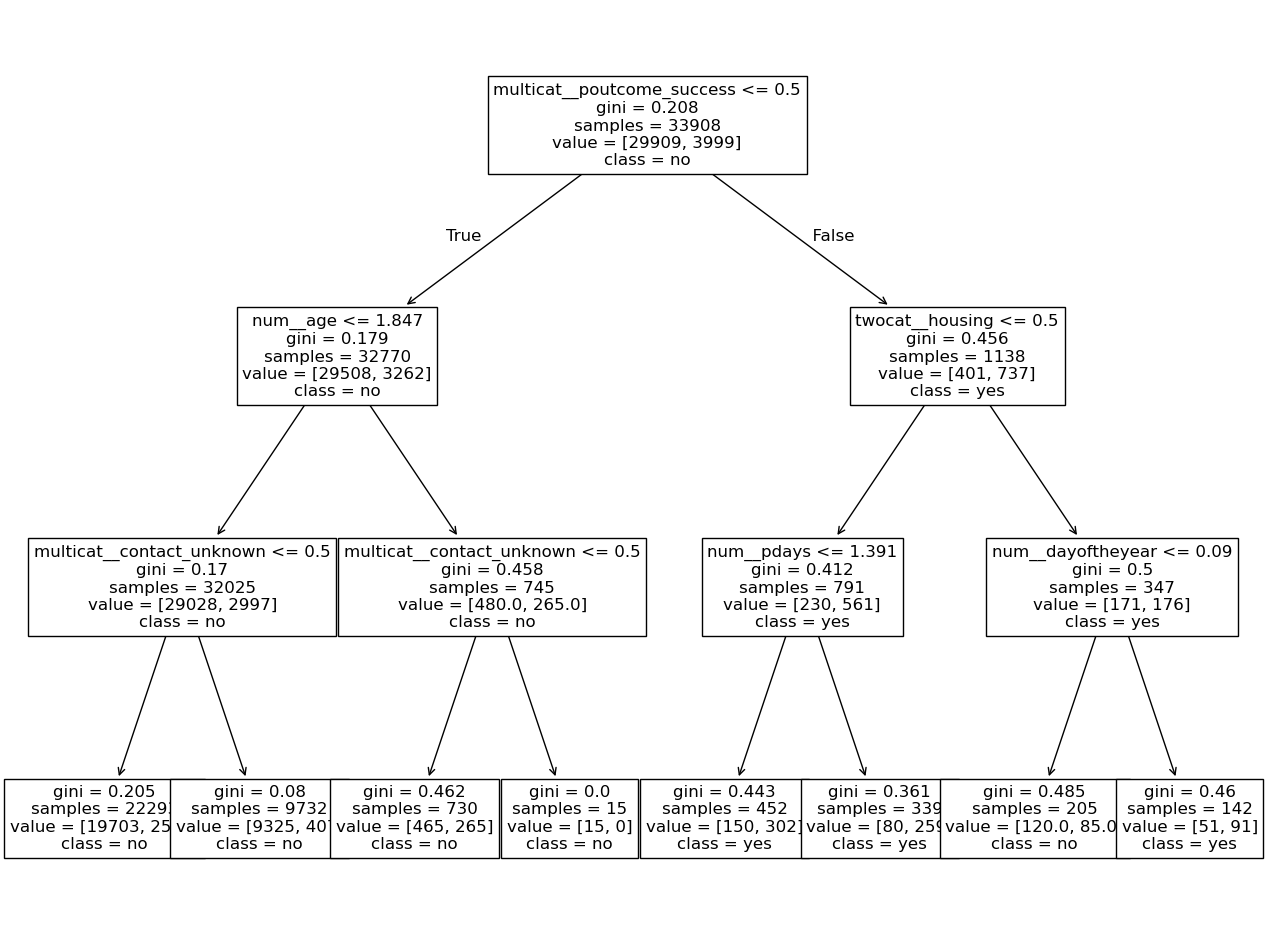

In [19]:
# Decision tree model creation and tree visualization
from sklearn import tree

plt.figure(figsize=(16, 12))
tree.plot_tree(dt1_clf["classifier"], 
               feature_names = dt1_clf["preprocessor"].get_feature_names_out(),
               class_names=["no", "yes"],
               fontsize=12)
plt.show()

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [20]:
# create a new train and test dataset with a different seed
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=42)

In [21]:
# Second tree creation
dt2_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3))
])

# Fit the model
dt2_clf.fit(X_train2, y_train2)

# Show metrics
y_pred = dt2_clf.predict(X_test2)
show_model_metrics(dt2_clf, y_pred, y_test2)

DecisionTreeClassifier
Accuracy: 0.8912678050075201
Precision: 0.6657754010695187
Recall: 0.18403547671840353
f1-score: 0.28836132020845395
------------------


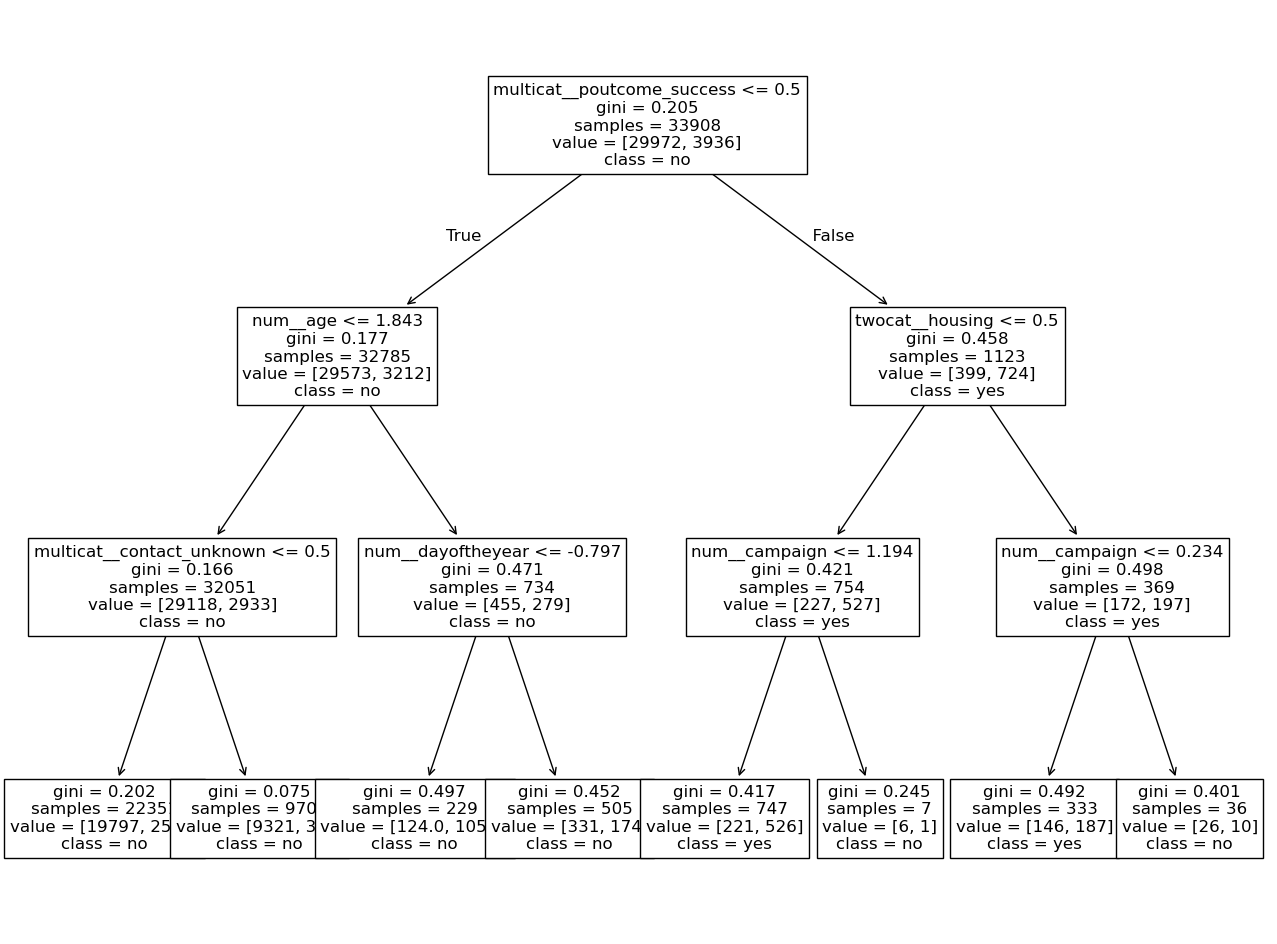

In [22]:
plt.figure(figsize=(16, 12))
tree.plot_tree(dt2_clf["classifier"], 
               feature_names = dt2_clf["preprocessor"].get_feature_names_out(),
               class_names=["no", "yes"],
               fontsize=12)
plt.show()

What can you tell about the two trees?

They look alike but they are slightly different on certain nodes.

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [23]:
# Test if the target is balanced
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [24]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_validate
metrics = ["accuracy", "precision", "recall", "f1"]

cv_results_dt1 = cross_validate(dt1_clf, X_train, y_train, cv=5, scoring=metrics)
cv_results_dt2 = cross_validate(dt2_clf, X_train2, y_train2, cv=5, scoring=metrics)

In [25]:
import numpy as np
def show_cv_metrics(cv_results):
    print("CV Accuracy : {0} ± {1}".format(round(np.mean(cv_results["test_accuracy"]), 3),
                            round(np.std(cv_results["test_accuracy"]), 3)))
    print("CV Precision : {0} ± {1}".format(round(np.mean(cv_results["test_precision"]), 3),
                            round(np.std(cv_results["test_precision"]), 3)))
    print("CV Recall : {0} ± {1}".format(round(np.mean(cv_results["test_recall"]), 3),
                            round(np.std(cv_results["test_recall"]), 3)))
    print("CV F1 Score : {0} ± {1}".format(round(np.mean(cv_results["test_f1"]), 3),
                            round(np.std(cv_results["test_f1"]), 3)))

print("Decision Tree 1")
show_cv_metrics(cv_results_dt1)
print("---------------------\n")
print("Decision Tree 2")
show_cv_metrics(cv_results_dt2)

Decision Tree 1
CV Accuracy : 0.892 ± 0.001
CV Precision : 0.678 ± 0.023
CV Recall : 0.161 ± 0.008
CV F1 Score : 0.26 ± 0.01
---------------------

Decision Tree 2
CV Accuracy : 0.893 ± 0.002
CV Precision : 0.658 ± 0.046
CV Recall : 0.167 ± 0.018
CV F1 Score : 0.266 ± 0.02


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Bonus : Plot your metrics performance

In [26]:
# BONUS: performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [27]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" : np.linspace(2, 100, 99, dtype=int)}

grid_search = Pipeline([
    ('preprocessor', preprocessor),
    ('gridsearch', GridSearchCV(DecisionTreeClassifier(),
                                param_grid=param_grid,
                                verbose=1,
                                n_jobs=-2,
                                scoring='f1'))
])
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 99 candidates, totalling 495 fits


,steps,"[('preprocessor', ...), ('gridsearch', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('twocat', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
result_grid_search = pd.DataFrame(grid_search["gridsearch"].cv_results_).sort_values(by="rank_test_score")
result_grid_search

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.301538,0.013576,0.008274,0.002112,15,{'max_depth': 15},0.345348,0.345853,0.331092,0.374502,0.354232,0.350205,0.014243,1
14,0.327430,0.025084,0.007414,0.000903,16,{'max_depth': 16},0.349155,0.349085,0.341424,0.342126,0.350958,0.346550,0.003962,2
15,0.325688,0.015171,0.007422,0.000739,17,{'max_depth': 17},0.342723,0.336560,0.316547,0.357254,0.346924,0.340002,0.013527,3
12,0.329375,0.033017,0.007858,0.000775,14,{'max_depth': 14},0.358333,0.336371,0.298401,0.344939,0.346313,0.336872,0.020470,4
17,0.349106,0.025852,0.008414,0.001156,19,{'max_depth': 19},0.356044,0.332857,0.319118,0.340058,0.332165,0.336048,0.012065,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.251660,0.032120,0.008402,0.000698,8,{'max_depth': 8},0.279208,0.276329,0.293054,0.279693,0.298364,0.285330,0.008716,95
2,0.171783,0.022694,0.010982,0.002337,4,{'max_depth': 4},0.265594,0.295367,0.257868,0.267857,0.319007,0.281138,0.022786,96
3,0.190412,0.022197,0.007759,0.001037,5,{'max_depth': 5},0.256358,0.287390,0.275794,0.272016,0.307544,0.279820,0.017050,97
4,0.224923,0.013571,0.012256,0.002263,6,{'max_depth': 6},0.282927,0.265487,0.281496,0.265084,0.294406,0.277880,0.011216,98


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [29]:
# Test metrics
dt_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=15))
])

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

show_model_metrics(dt_clf, y_pred, y_test)



DecisionTreeClassifier
Accuracy: 0.8810050429089622
Precision: 0.4602026049204052
Recall: 0.24651162790697675
f1-score: 0.3210499747602221
------------------


What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [30]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [31]:
# gridsearch for the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

grid_search = Pipeline([
    ('preprocessor', preprocessor),
    ('gridsearch', GridSearchCV(
        RandomForestClassifier(max_samples=0.8, class_weight='balanced', n_jobs=-2),
        param_grid={
            "n_estimators" : np.linspace(1, 200, 10, dtype=int),
            "max_depth" : np.linspace(1, 30, 10, dtype=int)
            },
        verbose=1,
        n_jobs=-2,
        scoring="f1"
        )
    )
])

grid_search.fit(X_train, y_train)
result_grid_search = pd.DataFrame(grid_search["gridsearch"].cv_results_).sort_values(by="rank_test_score")
result_grid_search

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
43,2.289895,0.187721,0.269454,0.087526,13,67,"{'max_depth': 13, 'n_estimators': 67}",0.434734,0.463866,0.444812,0.429851,0.424242,0.439501,0.013932,1
48,6.057443,0.729462,0.643763,0.228306,13,177,"{'max_depth': 13, 'n_estimators': 177}",0.428969,0.460126,0.446309,0.416519,0.434470,0.437279,0.014909,2
45,3.395758,0.472137,0.306625,0.046743,13,111,"{'max_depth': 13, 'n_estimators': 111}",0.433898,0.453363,0.450083,0.420299,0.419394,0.435407,0.014316,3
46,4.380652,0.577029,0.417021,0.146320,13,133,"{'max_depth': 13, 'n_estimators': 133}",0.423804,0.461538,0.443080,0.421175,0.426667,0.435253,0.015200,4
47,5.520803,0.564756,0.745998,0.147281,13,155,"{'max_depth': 13, 'n_estimators': 155}",0.432492,0.456200,0.442222,0.425659,0.417622,0.434839,0.013394,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.349741,0.084480,0.047735,0.005618,23,1,"{'max_depth': 23, 'n_estimators': 1}",0.291691,0.318258,0.282881,0.276018,0.265871,0.286944,0.017794,96
90,0.450228,0.089710,0.040860,0.007474,30,1,"{'max_depth': 30, 'n_estimators': 1}",0.282216,0.293417,0.285009,0.254990,0.299805,0.283088,0.015363,97
60,0.304636,0.068396,0.031906,0.009860,20,1,"{'max_depth': 20, 'n_estimators': 1}",0.293473,0.261179,0.281024,0.285571,0.293994,0.283048,0.011977,98
80,0.334635,0.103225,0.033836,0.017121,26,1,"{'max_depth': 26, 'n_estimators': 1}",0.290383,0.296252,0.273452,0.267717,0.254914,0.276543,0.015068,99


In [32]:
result_grid_search[result_grid_search["param_max_depth"]==13].sort_values("param_n_estimators")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.296366,0.069410,0.046773,0.012299,13,1,"{'max_depth': 13, 'n_estimators': 1}",0.334654,0.348544,0.329327,0.322665,0.333636,0.333765,0.008510,61
41,0.736980,0.116217,0.080230,0.033131,13,23,"{'max_depth': 13, 'n_estimators': 23}",0.416390,0.450704,0.424209,0.396376,0.430861,0.423708,0.017781,17
42,1.286379,0.055698,0.128417,0.031047,13,45,"{'max_depth': 13, 'n_estimators': 45}",0.432967,0.450201,0.438889,0.424939,0.419664,0.433332,0.010704,6
43,2.289895,0.187721,0.269454,0.087526,13,67,"{'max_depth': 13, 'n_estimators': 67}",0.434734,0.463866,0.444812,0.429851,0.424242,0.439501,0.013932,1
44,2.893417,0.293981,0.292778,0.171543,13,89,"{'max_depth': 13, 'n_estimators': 89}",0.427273,0.456728,0.440963,0.417112,0.418968,0.432209,0.014869,8
45,3.395758,0.472137,0.306625,0.046743,13,111,"{'max_depth': 13, 'n_estimators': 111}",0.433898,0.453363,0.450083,0.420299,0.419394,0.435407,0.014316,3
46,4.380652,0.577029,0.417021,0.146320,13,133,"{'max_depth': 13, 'n_estimators': 133}",0.423804,0.461538,0.443080,0.421175,0.426667,0.435253,0.015200,4
47,5.520803,0.564756,0.745998,0.147281,13,155,"{'max_depth': 13, 'n_estimators': 155}",0.432492,0.456200,0.442222,0.425659,0.417622,0.434839,0.013394,5
48,6.057443,0.729462,0.643763,0.228306,13,177,"{'max_depth': 13, 'n_estimators': 177}",0.428969,0.460126,0.446309,0.416519,0.434470,0.437279,0.014909,2
49,6.338828,0.798536,0.626365,0.102589,13,200,"{'max_depth': 13, 'n_estimators': 200}",0.429613,0.460126,0.446927,0.409392,0.420158,0.433243,0.018239,7


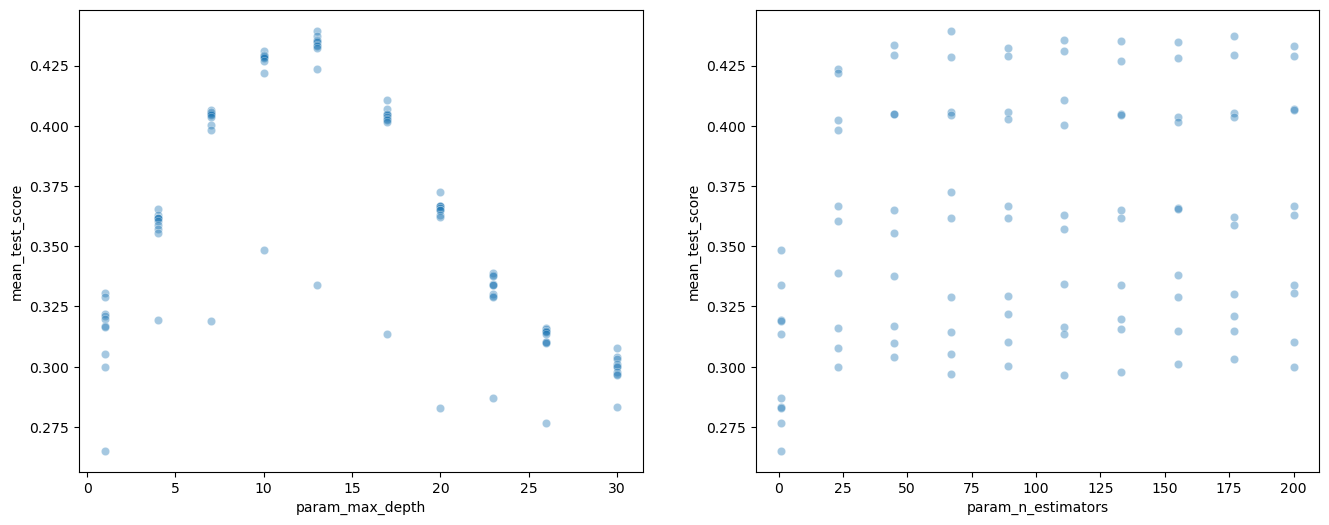

In [33]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(result_grid_search, x="param_max_depth", y="mean_test_score", alpha=0.4, ax=ax[0])
sns.scatterplot(result_grid_search, x="param_n_estimators", y="mean_test_score", alpha=0.4, ax=ax[1])
plt.show()

In [34]:
from matplotlib.lines import Line2D

Line2D.fillStyles

('full', 'left', 'right', 'bottom', 'top', 'none')

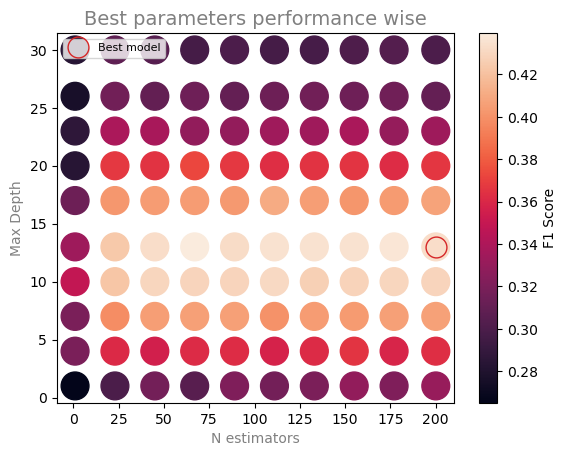

In [35]:
marker_style = dict(color='tab:red', linestyle='', marker='o',
                    markersize=15, markerfacecoloralt='tab:red')

plt.scatter(x=result_grid_search["param_n_estimators"], y=result_grid_search["param_max_depth"], c=result_grid_search["mean_test_score"], cmap=sns.color_palette("rocket", as_cmap=True), s=400)
plt.plot(result_grid_search["param_n_estimators"][49], result_grid_search["param_max_depth"][49], fillstyle='none', **marker_style, label="Best model")
plt.legend(fontsize=8, loc="upper left")
plt.colorbar(label="F1 Score")
plt.title("Best parameters performance wise", fontsize=14, color="gray")
plt.xlabel("N estimators", color="gray")
plt.ylabel("Max Depth", color="gray")
plt.show()

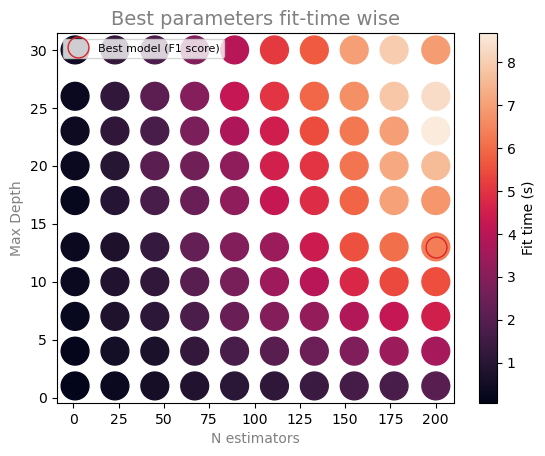

In [36]:
plt.scatter(x=result_grid_search["param_n_estimators"], y=result_grid_search["param_max_depth"], c=result_grid_search["mean_fit_time"], cmap=sns.color_palette("rocket", as_cmap=True), s=400)
plt.plot(result_grid_search["param_n_estimators"][49], result_grid_search["param_max_depth"][49], fillstyle='none', **marker_style, label="Best model (F1 score)")
plt.legend(fontsize=8, loc="upper left")
plt.colorbar(label="Fit time (s)")
plt.title("Best parameters fit-time wise", fontsize=14, color="gray")
plt.xlabel("N estimators", color="gray")
plt.ylabel("Max Depth", color="gray")
plt.show()

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

The best performing model in terms of F1 score is obtained with the following parameters:
- `max_depth = 13`
- `n_estimators = 200`

We have a clear optimum at `max_depth = 13` regardless of the number of estimators. We could most likely get a better performing model by increasing the number of estimators since 200 was the limit of what we scanned with `GridSearchCV`, however one of the constraints is also to have a time-efficient model, so we choose not to.

Also, we observe that by decreasing the number of estimators from 200 to ~20, we can have a model that is 10 times faster with marginally worse performance (43,6% -> 43,1% F1 score). Therefore, we choose the following parameters for our final model:
- `max_depth = 13`
- `n_estimators = 20`

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [37]:
# Test metrics
randomforest_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(max_depth=13, n_estimators=20, class_weight="balanced"))
])
randomforest_clf.fit(X_train, y_train)
y_pred = randomforest_clf.predict(X_test)
show_model_metrics(randomforest_clf, y_pred, y_test)

RandomForestClassifier
Accuracy: 0.8288065115456074
Precision: 0.354062186559679
Recall: 0.5218033998521804
f1-score: 0.4218703316402749
------------------


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

<Axes: xlabel='feature_importance', ylabel='feature'>

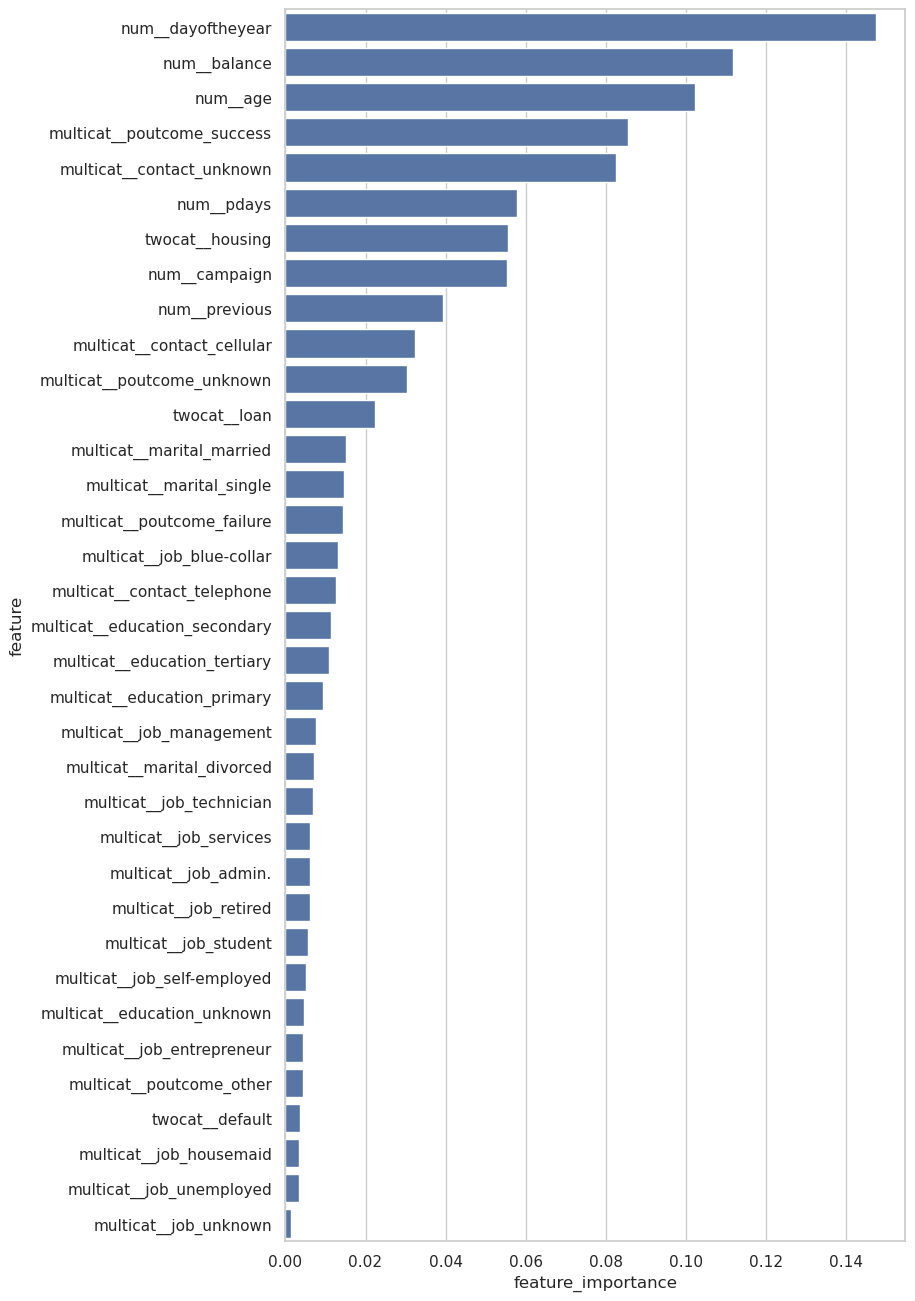

In [38]:
# display features' importance => use the RandomForest Object
feature_importances = pd.DataFrame({"feature": randomforest_clf["preprocessor"].get_feature_names_out(),
                                    "feature_importance": randomforest_clf["classifier"].feature_importances_})
feature_importances = feature_importances.sort_values(by="feature_importance", ascending=False)

plt.figure(figsize=(8,16))
sns.set_theme(style="whitegrid")
sns.barplot(feature_importances, x="feature_importance", y="feature")


What is the most important feature?

The most important feature is `dayoftheyear`.

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [40]:
# Feature selection with recursive elimination
from sklearn.feature_selection import RFECV

rfecv = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', RFECV(
        estimator=RandomForestClassifier(max_depth=13, n_estimators=100, class_weight="balanced", n_jobs=-2),
        step=1,
        cv=5,
        scoring="f1",
        min_features_to_select=1,
        verbose=0,
        n_jobs=-2))
])

rfecv.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('feature_selection', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('twocat', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
result_rfecv = pd.DataFrame({"n_features": rfecv["feature_selection"].cv_results_["n_features"],
                             "mean_test_score": rfecv["feature_selection"].cv_results_["mean_test_score"]})
result_rfecv = result_rfecv.sort_values(by="mean_test_score", ascending=False)

result_rfecv.head(5)

,n_features,mean_test_score
8,9,0.467676
9,10,0.463468
7,8,0.460703
11,12,0.451202
15,16,0.450982


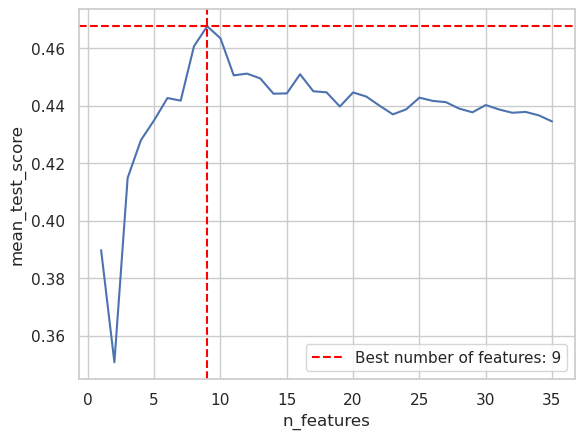

In [42]:
idmax = result_rfecv["mean_test_score"].idxmax()
n_features_best = result_rfecv["n_features"][idmax]
sns.lineplot(result_rfecv, x="n_features", y="mean_test_score")
plt.axvline(n_features_best, color="red", linestyle='--', label="Best number of features: {}".format(n_features_best))
plt.axhline(result_rfecv["mean_test_score"][idmax], color="red", linestyle='--')
plt.legend()
plt.show()

In [43]:
for i in range(5):
    mask = rfecv["feature_selection"].cv_results_[f"split{i}_support"][
        rfecv["feature_selection"].n_features_ - 1
    ]  # mask of features selected by the RFE
    features_selected = np.ma.compressed(np.ma.masked_array(rfecv["preprocessor"].get_feature_names_out(), mask=1 - mask))
    print(f"Features selected in fold {i}: {features_selected}")

Features selected in fold 0: ['num__age' 'num__balance' 'num__campaign' 'num__pdays' 'num__previous'
 'num__dayoftheyear' 'twocat__housing' 'multicat__contact_unknown'
 'multicat__poutcome_success']
Features selected in fold 1: ['num__age' 'num__balance' 'num__campaign' 'num__pdays' 'num__previous'
 'num__dayoftheyear' 'twocat__housing' 'multicat__contact_unknown'
 'multicat__poutcome_success']
Features selected in fold 2: ['num__age' 'num__balance' 'num__campaign' 'num__pdays' 'num__previous'
 'num__dayoftheyear' 'twocat__housing' 'multicat__contact_unknown'
 'multicat__poutcome_success']
Features selected in fold 3: ['num__age' 'num__balance' 'num__campaign' 'num__pdays' 'num__previous'
 'num__dayoftheyear' 'twocat__housing' 'multicat__contact_unknown'
 'multicat__poutcome_success']
Features selected in fold 4: ['num__age' 'num__balance' 'num__campaign' 'num__pdays' 'num__previous'
 'num__dayoftheyear' 'twocat__housing' 'multicat__contact_unknown'
 'multicat__poutcome_success']


In [44]:
# Do another grid search on your model with the subset of selected features
from sklearn.feature_selection import RFE, SelectFromModel
rf_featselect = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(
        RandomForestClassifier(max_depth=13, n_estimators=20, class_weight='balanced', n_jobs=-2),
        n_features_to_select = 9,
        verbose=0)),
    ('gridsearch', GridSearchCV(
        RandomForestClassifier(class_weight='balanced'),
        param_grid = {"max_depth": np.linspace(1, 30, 10, dtype=int),
                      "n_estimators": np.linspace(1, 200, 10, dtype=int)},
        verbose=1,
        n_jobs=-2,
        scoring='f1'))
])

rf_featselect.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('twocat', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
result_grid_search = pd.DataFrame(rf_featselect["gridsearch"].cv_results_).sort_values(by="rank_test_score")
result_grid_search

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,4.981638,0.325103,0.136722,0.016220,13,111,"{'max_depth': 13, 'n_estimators': 111}",0.464524,0.483041,0.479070,0.459658,0.459627,0.469184,0.009935,1
37,5.586372,0.425535,0.144326,0.021969,10,155,"{'max_depth': 10, 'n_estimators': 155}",0.464455,0.476738,0.473196,0.460139,0.463076,0.467521,0.006337,2
48,8.070415,0.176635,0.201452,0.026493,13,177,"{'max_depth': 13, 'n_estimators': 177}",0.465033,0.479191,0.476412,0.451174,0.459324,0.466227,0.010464,3
46,6.130300,0.249800,0.154256,0.017678,13,133,"{'max_depth': 13, 'n_estimators': 133}",0.458308,0.481132,0.478312,0.454154,0.458874,0.466156,0.011231,4
36,5.180744,0.130139,0.163811,0.058437,10,133,"{'max_depth': 10, 'n_estimators': 133}",0.462749,0.472107,0.471495,0.459227,0.463482,0.465812,0.005101,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.389346,0.040614,0.016945,0.001642,1,45,"{'max_depth': 1, 'n_estimators': 45}",0.306893,0.278680,0.319635,0.285285,0.274000,0.292899,0.017481,96
90,0.060644,0.009241,0.007090,0.001189,30,1,"{'max_depth': 30, 'n_estimators': 1}",0.290532,0.295369,0.278689,0.298211,0.290407,0.290642,0.006672,97
80,0.070057,0.009601,0.009267,0.004001,26,1,"{'max_depth': 26, 'n_estimators': 1}",0.310386,0.285181,0.295123,0.263312,0.297477,0.290296,0.015702,98
1,0.206574,0.043450,0.014190,0.003666,1,23,"{'max_depth': 1, 'n_estimators': 23}",0.285572,0.279506,0.285714,0.285287,0.294455,0.286107,0.004783,99


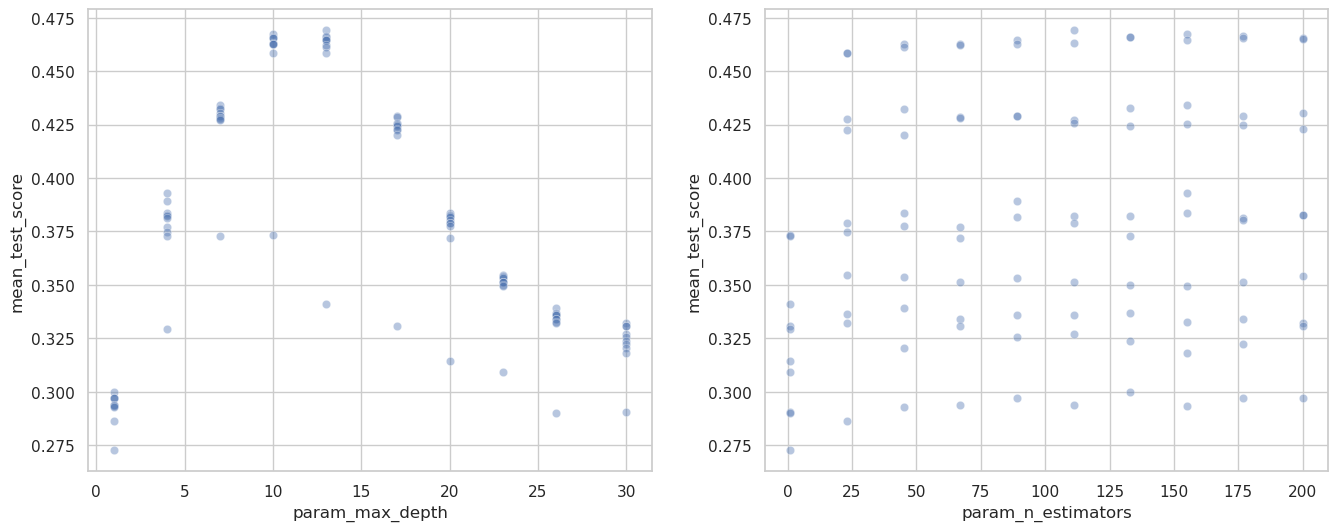

In [46]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(result_grid_search, x="param_max_depth", y="mean_test_score", alpha=0.4, ax=ax[0])
sns.scatterplot(result_grid_search, x="param_n_estimators", y="mean_test_score", alpha=0.4, ax=ax[1])
plt.show()

<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

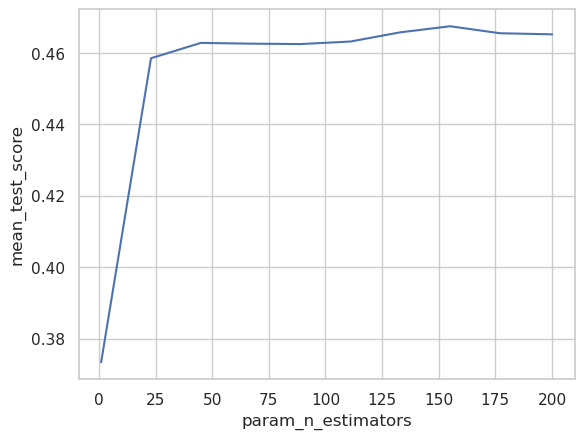

In [47]:
sns.lineplot(result_grid_search[result_grid_search["param_max_depth"]==10], x="param_n_estimators", y="mean_test_score")


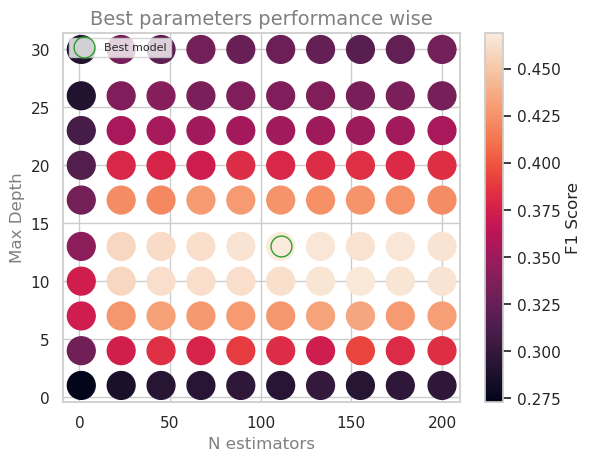

In [48]:
marker_style = dict(color='tab:green', linestyle='', marker='o',
                    markersize=15, markerfacecoloralt='tab:green')

idmax = result_grid_search["mean_test_score"].idxmax()


plt.scatter(x=result_grid_search["param_n_estimators"], y=result_grid_search["param_max_depth"], c=result_grid_search["mean_test_score"], cmap=sns.color_palette("rocket", as_cmap=True), s=400)
plt.plot(result_grid_search["param_n_estimators"][idmax], result_grid_search["param_max_depth"][idmax], fillstyle='none', **marker_style, label="Best model")
plt.legend(fontsize=8, loc="upper left")
plt.colorbar(label="F1 Score")
plt.title("Best parameters performance wise", fontsize=14, color="gray")
plt.xlabel("N estimators", color="gray")
plt.ylabel("Max Depth", color="gray")
plt.show()

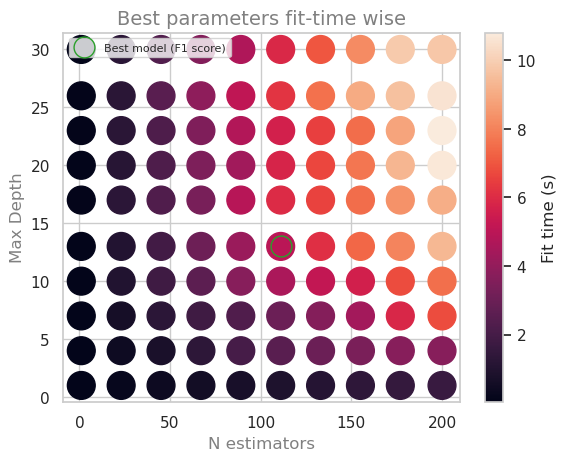

In [49]:
marker_style = dict(color='tab:green', linestyle='', marker='o',
                    markersize=15, markerfacecoloralt='tab:green')
                    
plt.scatter(x=result_grid_search["param_n_estimators"], y=result_grid_search["param_max_depth"], c=result_grid_search["mean_fit_time"], cmap=sns.color_palette("rocket", as_cmap=True), s=400)
plt.plot(result_grid_search["param_n_estimators"][idmax], result_grid_search["param_max_depth"][idmax], fillstyle='none', **marker_style, label="Best model (F1 score)")
plt.legend(fontsize=8, loc="upper left")
plt.colorbar(label="Fit time (s)")
plt.title("Best parameters fit-time wise", fontsize=14, color="gray")
plt.xlabel("N estimators", color="gray")
plt.ylabel("Max Depth", color="gray")
plt.show()

In [50]:
y_pred = rf_featselect.predict(X_test)
show_model_metrics(rf_featselect, y_pred, y_test, name='gridsearch')

GridSearchCV
Accuracy: 0.8606564628859594
Precision: 0.4288461538461538
Recall: 0.49445676274944567
f1-score: 0.4593202883625129
------------------


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [51]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [52]:
import xgboost as xgb
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
randomforest_xgboost = Pipeline([
    ('preprocessor', preprocessor),
    ('gridsearch', GridSearchCV(xgb.XGBRFClassifier(n_jobs=-2),
                                param_grid={"max_depth":np.linspace(1, 30, 10, dtype=int),
                                            "n_estimators": np.linspace(1,200, 10, dtype=int)},
                                            n_jobs=-2,
                                            verbose=1,
                                            scoring="f1"))
])

randomforest_xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/julien-d/anaconda3/envs/ML2/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/julien-d/anaconda3/envs/ML2/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' v

,steps,"[('preprocessor', ...), ('gridsearch', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('twocat', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [53]:
# model building and evaluation


In [54]:
# gridsearch 

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [55]:
result_xgboost = pd.DataFrame(randomforest_xgboost["gridsearch"].cv_results_).sort_values(by="mean_test_score", ascending=False)
result_xgboost

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
75,5.780157,0.038772,0.379347,0.038847,23,111,"{'max_depth': 23, 'n_estimators': 111}",0.454791,0.474849,0.474801,0.469676,0.451160,0.465055,0.010106,1
77,8.211227,0.203247,0.518301,0.037792,23,155,"{'max_depth': 23, 'n_estimators': 155}",0.455526,0.472801,0.480744,0.469590,0.445538,0.464839,0.012635,2
69,9.893959,0.283668,0.613571,0.090757,20,200,"{'max_depth': 20, 'n_estimators': 200}",0.453815,0.476510,0.476954,0.469083,0.446943,0.464661,0.012187,3
87,9.511183,0.469925,0.521446,0.048021,26,155,"{'max_depth': 26, 'n_estimators': 155}",0.452046,0.480589,0.472703,0.465812,0.452064,0.464643,0.011292,4
68,8.630032,0.191020,0.532131,0.052000,20,177,"{'max_depth': 20, 'n_estimators': 177}",0.456304,0.476510,0.475300,0.467236,0.447109,0.464492,0.011296,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.803461,0.059920,0.021269,0.002003,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.291339,0.303393,0.294514,0.276488,0.265084,0.286164,0.013648,91
6,0.538641,0.051256,0.015551,0.001801,1,133,"{'max_depth': 1, 'n_estimators': 133}",0.291339,0.303393,0.294514,0.276488,0.265084,0.286164,0.013648,91
7,0.586411,0.049235,0.021847,0.006828,1,155,"{'max_depth': 1, 'n_estimators': 155}",0.291339,0.303393,0.294514,0.276488,0.265084,0.286164,0.013648,91
2,0.353494,0.030087,0.011563,0.002864,1,45,"{'max_depth': 1, 'n_estimators': 45}",0.291339,0.303393,0.294514,0.276488,0.265084,0.286164,0.013648,91


In [56]:
# Test metrics
randomforest_xgboost_best_estimator = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBRFClassifier(max_depth=23, n_estimators=111,n_jobs=-2))
])

randomforest_xgboost_best_estimator.fit(X_train, y_train)
y_pred = randomforest_xgboost_best_estimator.predict(X_test)
show_model_metrics(randomforest_xgboost_best_estimator, y_pred, y_test)

XGBRFClassifier
Accuracy: 0.8779969919490401
Precision: 0.48898305084745763
Recall: 0.42645971914264597
f1-score: 0.45558626135017766
------------------


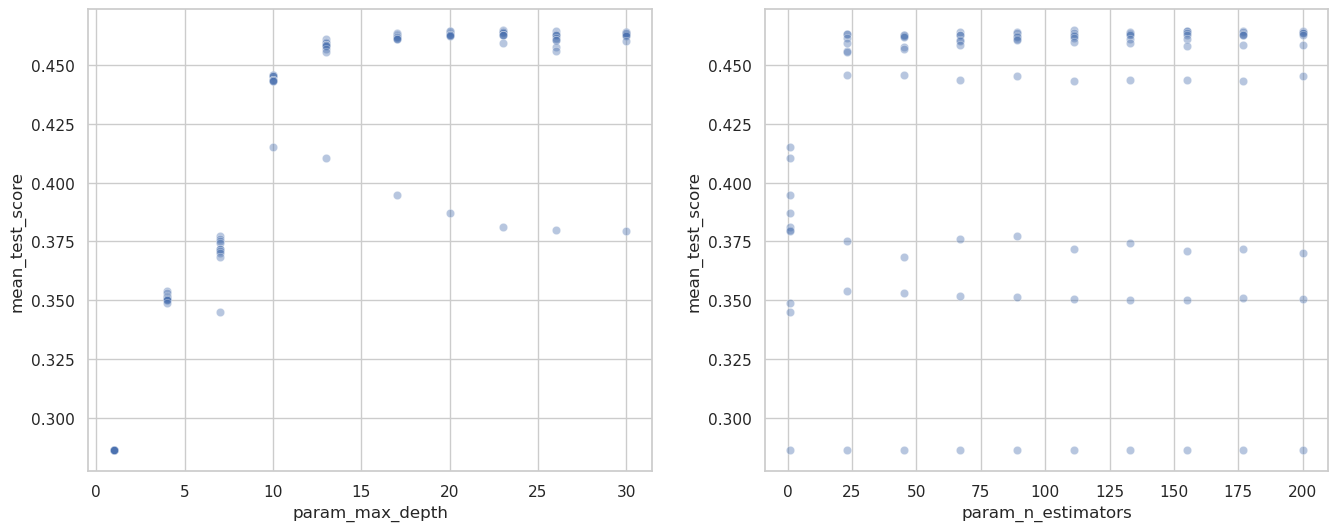

In [57]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(result_xgboost, x="param_max_depth", y="mean_test_score", alpha=0.4, ax=ax[0])
sns.scatterplot(result_xgboost, x="param_n_estimators", y="mean_test_score", alpha=0.4, ax=ax[1])
plt.show()

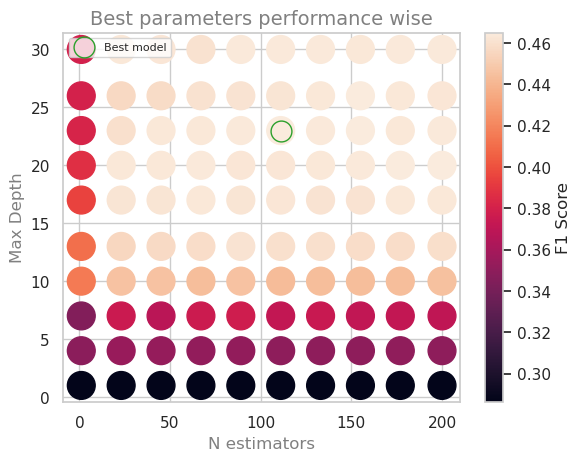

In [58]:
marker_style = dict(color='tab:green', linestyle='', marker='o',
                    markersize=15, markerfacecoloralt='tab:green')

idmax = result_xgboost["mean_test_score"].idxmax()


plt.scatter(x=result_xgboost["param_n_estimators"], y=result_xgboost["param_max_depth"], c=result_xgboost["mean_test_score"], cmap=sns.color_palette("rocket", as_cmap=True), s=400)
plt.plot(result_xgboost["param_n_estimators"][idmax], result_xgboost["param_max_depth"][idmax], fillstyle='none', **marker_style, label="Best model")
plt.legend(fontsize=8, loc="upper left")
plt.colorbar(label="F1 Score")
plt.title("Best parameters performance wise", fontsize=14, color="gray")
plt.xlabel("N estimators", color="gray")
plt.ylabel("Max Depth", color="gray")
plt.show()

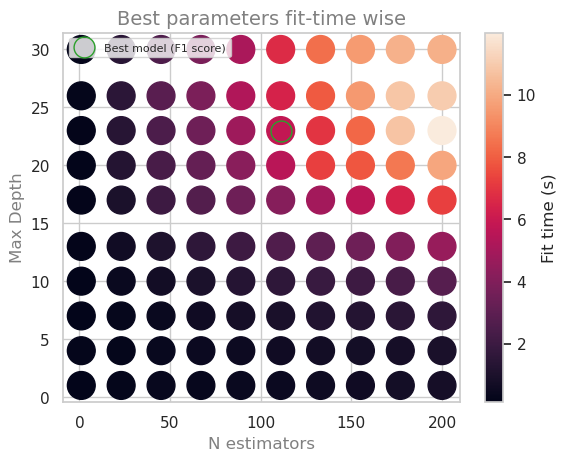

In [59]:
marker_style = dict(color='tab:green', linestyle='', marker='o',
                    markersize=15, markerfacecoloralt='tab:green')
                    
plt.scatter(x=result_xgboost["param_n_estimators"], y=result_xgboost["param_max_depth"], c=result_xgboost["mean_fit_time"], cmap=sns.color_palette("rocket", as_cmap=True), s=400)
plt.plot(result_xgboost["param_n_estimators"][idmax], result_xgboost["param_max_depth"][idmax], fillstyle='none', **marker_style, label="Best model (F1 score)")
plt.legend(fontsize=8, loc="upper left")
plt.colorbar(label="Fit time (s)")
plt.title("Best parameters fit-time wise", fontsize=14, color="gray")
plt.xlabel("N estimators", color="gray")
plt.ylabel("Max Depth", color="gray")
plt.show()

## Let's Conclude

Report your test set metrics for the three methods here

In [60]:
# Decision Tree on test set
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
show_model_metrics(dt_clf, y_pred, y_test)

DecisionTreeClassifier
Accuracy: 0.8788817128196054
Precision: 0.4879518072289157
Recall: 0.2394678492239468
f1-score: 0.32126921170054534
------------------


In [61]:
# Random forest on test set
y_pred = rf_featselect.predict(X_test)
show_model_metrics(rf_featselect, y_pred, y_test, name="gridsearch")

GridSearchCV
Accuracy: 0.8606564628859594
Precision: 0.4288461538461538
Recall: 0.49445676274944567
f1-score: 0.4593202883625129
------------------


In [62]:
# XGBoost on test set
y_pred = randomforest_xgboost_best_estimator.predict(X_test)
show_model_metrics(randomforest_xgboost_best_estimator, y_pred, y_test)

XGBRFClassifier
Accuracy: 0.8779969919490401
Precision: 0.48898305084745763
Recall: 0.42645971914264597
f1-score: 0.45558626135017766
------------------


What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

Les performances sont globalement assez mauvaises, les données ne permettent pas bien de prédire la target variable.

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [63]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [64]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [65]:
# code here